# <center>~ Exploration of US Flight Data ~</center>
## <center>A glimpse into flight data for Pittsburgh, PA in 1988 and 2007</center>
#### Created by Miles Murphy
#### October 31, 2020



# Add Coloring and formatting to center, etc

# Table of Contents:
1. [Introduction](#introduction)

2. [Project Background](#project_background)
    1. [Data Source Information](#data_source_information)
3. [Data Wrangling](#data_wrangling)
    1. [Data Details](#data_details)
    2. [Data Tidiness](#data_tidiness)
    3. [Data Quality](#data_quality)
4. [Data Exploration](#data_exploration)
    1. [Univariate Exploration](#univariate_exploration)
    2. [Bivariate Exploration](#bivariate_exploration)
    3. [Multivariate Exploration](#multivariate_exploration)


## Introduction: <a name="introduction"></a>

The last 6 months of my life have been very productive while simultaneously mundane. Covid-19 turned society upside-down and the plan I was developing for my life took a 180-degree turn. Instead of being in a new public service role in a larger government, I find myself completing 6 months of 'night-school' classes related to Data Analysis. The last 6 months have shown me that I do not want to stay in government work, at least not in a front-facing role. Instead, I hope to find opportunities related to my interests and passions, data analysis/programming and environmental conservation respectively. 

I am telling you all this, because this exploration of flight data for the year of 1988 and 2007 is my last project in my second Nanodegree and it will be submitted within weeks, if not days, of my 32nd birthday. I had no idea what I was going to do when I graduated highschool in 2007, let alone college in 2011, but I can assure you it did not involve me having even a remote understanding of Python, Git, SQL, and other programming related languages. Yet, on this Halloween evening, I am sitting infront of my desktop building the outline of a project which may eventually open a door for a new job and an entirely new trajectory for my life. So, as I socially distance I will take you through flight data from the year 1988 and the year 2007(when I first left Pittsburgh), in honor of my impending birthday and the start this new adventure. 

## Project Background: <a name="project_background"></a>

### Data Source Information: <a name="data_source_informationd"></a>

The data for this project comes from the larger ongoing database the Bureau of Transportation Statistics maintains related to Carrier On-Time Performance. The larger database features more details related to each flight, such as the reporting airline, airport location data, and other details. The database used in this project does not feature all of these details. Furthermore, the earlier the data is, the less complete the flight information. 

## Data Wrangling <a name="data_wrangling"></a>

### Data Details: <a name="data_details"></a>

In [1]:
#Import packages and set plots to be embedded
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import datetime as dt

%matplotlib inline

In [2]:
#load dataset into a pandas df
flights_88 = pd.read_csv('dataverse_files/1988.csv', dtype={'ArrTime': str, 'DepTime':str, 'CRSDepTime': str, 'CRSArrTime':str} )
flights_07 = pd.read_csv('dataverse_files/2007.csv', dtype={'ArrTime': str, 'DepTime':str, 'CRSDepTime': str, 'CRSArrTime':str})

#### What is the structure of the datasets?

In [3]:
#Exmaine basic df information
flights_88.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5202096 entries, 0 to 5202095
Data columns (total 29 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Year               int64  
 1   Month              int64  
 2   DayofMonth         int64  
 3   DayOfWeek          int64  
 4   DepTime            object 
 5   CRSDepTime         object 
 6   ArrTime            object 
 7   CRSArrTime         object 
 8   UniqueCarrier      object 
 9   FlightNum          int64  
 10  TailNum            float64
 11  ActualElapsedTime  float64
 12  CRSElapsedTime     int64  
 13  AirTime            float64
 14  ArrDelay           float64
 15  DepDelay           float64
 16  Origin             object 
 17  Dest               object 
 18  Distance           float64
 19  TaxiIn             float64
 20  TaxiOut            float64
 21  Cancelled          int64  
 22  CancellationCode   float64
 23  Diverted           int64  
 24  CarrierDelay       float64
 25  WeatherDelay      

In [4]:
flights_07.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7453215 entries, 0 to 7453214
Data columns (total 29 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Year               int64  
 1   Month              int64  
 2   DayofMonth         int64  
 3   DayOfWeek          int64  
 4   DepTime            object 
 5   CRSDepTime         object 
 6   ArrTime            object 
 7   CRSArrTime         object 
 8   UniqueCarrier      object 
 9   FlightNum          int64  
 10  TailNum            object 
 11  ActualElapsedTime  float64
 12  CRSElapsedTime     float64
 13  AirTime            float64
 14  ArrDelay           float64
 15  DepDelay           float64
 16  Origin             object 
 17  Dest               object 
 18  Distance           int64  
 19  TaxiIn             int64  
 20  TaxiOut            int64  
 21  Cancelled          int64  
 22  CancellationCode   object 
 23  Diverted           int64  
 24  CarrierDelay       int64  
 25  WeatherDelay      

In [5]:
#Examine numerical data basic details
flights_88.describe()

,Year,Month,DayofMonth,DayOfWeek,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
count,5202096.0,5.202096e+06,5.202096e+06,5.202096e+06,5.202096e+06,0.0,5.137497e+06,5.202096e+06,0.0,5.137497e+06,...,0.0,0.0,5.202096e+06,0.0,5.202096e+06,0.0,0.0,0.0,0.0,0.0
mean,1988.0,6.508971e+00,1.575754e+01,3.954361e+00,6.870138e+02,NaN,1.040407e+02,1.039866e+02,NaN,6.547350e+00,...,NaN,NaN,9.642844e-03,NaN,2.775035e-03,NaN,NaN,NaN,NaN,NaN
std,0.0,3.445201e+00,8.798635e+00,1.987931e+00,5.186402e+02,NaN,6.196058e+01,6.173844e+01,NaN,2.332517e+01,...,NaN,NaN,9.772339e-02,NaN,5.260547e-02,NaN,NaN,NaN,NaN,NaN
min,1988.0,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,NaN,-5.300000e+02,-5.200000e+01,NaN,-1.185000e+03,...,NaN,NaN,0.000000e+00,NaN,0.000000e+00,NaN,NaN,NaN,NaN,NaN
25%,1988.0,4.000000e+00,8.000000e+00,2.000000e+00,2.960000e+02,NaN,6.100000e+01,6.100000e+01,NaN,-5.000000e+00,...,NaN,NaN,0.000000e+00,NaN,0.000000e+00,NaN,NaN,NaN,NaN,NaN
50%,1988.0,7.000000e+00,1.600000e+01,4.000000e+00,5.780000e+02,NaN,8.500000e+01,8.500000e+01,NaN,2.000000e+00,...,NaN,NaN,0.000000e+00,NaN,0.000000e+00,NaN,NaN,NaN,NaN,NaN
75%,1988.0,1.000000e+01,2.300000e+01,6.000000e+00,9.380000e+02,NaN,1.320000e+02,1.320000e+02,NaN,1.100000e+01,...,NaN,NaN,0.000000e+00,NaN,0.000000e+00,NaN,NaN,NaN,NaN,NaN
max,1988.0,1.200000e+01,3.100000e+01,7.000000e+00,6.189000e+03,NaN,1.737000e+03,1.560000e+03,NaN,1.394000e+03,...,NaN,NaN,1.000000e+00,NaN,1.000000e+00,NaN,NaN,NaN,NaN,NaN


In [6]:
flights_07.describe()

,Year,Month,DayofMonth,DayOfWeek,FlightNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Distance,TaxiIn,TaxiOut,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
count,7453215.0,7.453215e+06,7.453215e+06,7.453215e+06,7.453215e+06,7.275288e+06,7.452221e+06,7.275288e+06,7.275288e+06,7.292467e+06,7.453215e+06,7.453215e+06,7.453215e+06,7.453215e+06,7.453215e+06,7.453215e+06,7.453215e+06,7.453215e+06,7.453215e+06,7.453215e+06
mean,2007.0,6.514876e+00,1.572589e+01,3.933804e+00,2.188099e+03,1.263223e+02,1.272502e+02,1.028159e+02,1.019218e+01,1.139914e+01,7.198058e+02,6.691984e+00,1.630015e+01,2.156761e-02,2.304911e-03,3.865236e+00,7.700904e-01,3.783702e+00,2.373553e-02,5.099134e+00
std,0.0,3.425117e+00,8.781154e+00,1.992267e+00,1.971958e+03,7.118009e+01,7.035750e+01,6.824577e+01,3.930774e+01,3.614189e+01,5.623051e+02,5.151351e+00,1.183396e+01,1.452668e-01,4.795413e-02,2.084240e+01,9.619547e+00,1.617670e+01,1.084995e+00,2.127753e+01
min,2007.0,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.200000e+01,-1.240000e+03,0.000000e+00,-3.120000e+02,-3.050000e+02,1.100000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2007.0,4.000000e+00,8.000000e+00,2.000000e+00,5.900000e+02,7.600000e+01,7.700000e+01,5.500000e+01,-9.000000e+00,-4.000000e+00,3.190000e+02,4.000000e+00,1.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2007.0,7.000000e+00,1.600000e+01,4.000000e+00,1.509000e+03,1.080000e+02,1.100000e+02,8.400000e+01,0.000000e+00,0.000000e+00,5.690000e+02,5.000000e+00,1.400000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,2007.0,9.000000e+00,2.300000e+01,6.000000e+00,3.553000e+03,1.560000e+02,1.560000e+02,1.310000e+02,1.400000e+01,1.100000e+01,9.460000e+02,8.000000e+00,1.900000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,2007.0,1.200000e+01,3.100000e+01,7.000000e+00,9.602000e+03,1.270000e+03,1.430000e+03,1.257000e+03,2.598000e+03,2.601000e+03,4.962000e+03,5.450000e+02,5.300000e+02,1.000000e+00,1.000000e+00,2.580000e+03,1.429000e+03,1.386000e+03,3.820000e+02,1.031000e+03


In [7]:
#Examine first 5 rows
flights_88.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,1988,1,9,6,1348,1331,1458,1435,PI,942,...,NaN,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN
1,1988,1,10,7,1334,1331,1443,1435,PI,942,...,NaN,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2,1988,1,11,1,1446,1331,1553,1435,PI,942,...,NaN,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN
3,1988,1,12,2,1334,1331,1438,1435,PI,942,...,NaN,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN
4,1988,1,13,3,1341,1331,1503,1435,PI,942,...,NaN,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN


In [8]:
flights_07.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2007,1,1,1,1232,1225,1341,1340,WN,2891,...,4,11,0,NaN,0,0,0,0,0,0
1,2007,1,1,1,1918,1905,2043,2035,WN,462,...,5,6,0,NaN,0,0,0,0,0,0
2,2007,1,1,1,2206,2130,2334,2300,WN,1229,...,6,9,0,NaN,0,3,0,0,0,31
3,2007,1,1,1,1230,1200,1356,1330,WN,1355,...,3,8,0,NaN,0,23,0,0,0,3
4,2007,1,1,1,831,830,957,1000,WN,2278,...,3,9,0,NaN,0,0,0,0,0,0


In [9]:
flights_88.isna().any()

Year                 False
Month                False
DayofMonth           False
DayOfWeek            False
DepTime               True
CRSDepTime           False
ArrTime               True
CRSArrTime           False
UniqueCarrier        False
FlightNum            False
TailNum               True
ActualElapsedTime     True
CRSElapsedTime       False
AirTime               True
ArrDelay              True
DepDelay              True
Origin               False
Dest                 False
Distance              True
TaxiIn                True
TaxiOut               True
Cancelled            False
CancellationCode      True
Diverted             False
CarrierDelay          True
WeatherDelay          True
NASDelay              True
SecurityDelay         True
LateAircraftDelay     True
dtype: bool

In [10]:
flights_07.isna().any()

Year                 False
Month                False
DayofMonth           False
DayOfWeek            False
DepTime               True
CRSDepTime           False
ArrTime               True
CRSArrTime           False
UniqueCarrier        False
FlightNum            False
TailNum               True
ActualElapsedTime     True
CRSElapsedTime        True
AirTime               True
ArrDelay              True
DepDelay              True
Origin               False
Dest                 False
Distance             False
TaxiIn               False
TaxiOut              False
Cancelled            False
CancellationCode      True
Diverted             False
CarrierDelay         False
WeatherDelay         False
NASDelay             False
SecurityDelay        False
LateAircraftDelay    False
dtype: bool

The two datasets repesent data related to all flight activity record in 1988 and 2007. There are 5202096 flights in the 88 df and 7453215 flights in the 07 df. 

In honor of my place of birth and domecile for 20 of my nearly 32 years on Earth, we will look at only flight data related to Pittsburgh, PA. However, in addition to focusing on just flights related to Pittsburgh, there are other Data Tidiness and Data Quality issues which may need to be cleaned to create more efficient dataframse for visual exploration.

#### What is/are the main feature(s) of interest in the datasets?

There are many interesting aspects of the flight data in both 88 and 07, but 7 main features of interest stand out in this dataset at this point:
<ul>
    <li>The most popular month for travel in 88 and 07</li>
    <li>The most popular day of the week for travel in 88 and 07</li>
    <li>The most popular origins for flights arriving in Pittsburgh</li>
    <li>The most popular destinations for flights departing from Pittsburgh</li>
    <li>The length of flights</li>
    <li>The length of delays for flights that experience them</li>
    <li>The most common type of delay</li>
</ul>

#### What features in the dataset will help support the investigation into the feature(s) of interest?

The first four areas of interest are easily examine utilizing the following columns:
<ol>
    <li>Month</li>
    <li>DayOfWeek</li>
    <li>Origin</li>
    <li>Destination</li>
    <li>ActualElapsedTime</li>
    <li>CarrierDelay, WeatherDelay, NASDelay, SecurityDelay, LateAircraftDelay</li>
</ol>

However, the last item is a little more difficult to handle. It may not be the most tidy method of organizing this dataframe, but a categorical column which details the type of delay would aid the visual exploration of the delay types for flights which experienced them. Additionally, it should be noted that delays can only be examined for the 07 df, as the 88 df did not include any delay information.

Regardless, the next step will be to create a copy of the original dataframes and begin to clean the data.

In [11]:
#Create df copy for cleaning
flights_88_cleaning = flights_88.copy()
flights_07_cleaning = flights_07.copy()

### Data Tidiness: <a name="data_tidiness"></a>

For Data Tidiness issues, this dataset is fairly good. Depending upon the analysis goals, the splitting of the data of each flight into four different pieces may not be efficient. The data could be combined into a date, a day of the week, and a time. However, if the data is being examined month to month, not having to use code to pull out the month of the date would be simpler. 

That being said, Data Tidiness issues will be handled as they develop from Data Quality cleaning steps, if any do develop. 

<ol>
    <li></li>
</ol>

### Data Quality: <a name="data_quality"></a>

<ol>
    <li>Only interested in flights originating or terminating in Pittsbrugh, PA</li>
    <li>Arrival Time and Departure Time related columns should be datetime objects, not floats</li>
    <li>Several NaN columns for the pgh_flights_88 df</li>
    <li>There is no categorial column for delays which would be useful in visualization of the data</li>
</ol>

#### 1. Only interested in flights originating or terminating in Pittsburgh, PA

<em><b>Define</b></em>

Query the 1988 2007 flight dataframe to select only the flights which involve Pittsburgh, PA by using the 'Origin' and 'Dest' columns

<em><b>Code</b></em>

In [12]:
flights_88_cleaning.Dest.value_counts()

ORD    274766
ATL    260573
DFW    220266
LAX    169699
DEN    163598
        ...  
GUC       149
ALO       118
GST        84
ACV        18
RDD        18
Name: Dest, Length: 236, dtype: int64

In [13]:
pgh_flights_88 = flights_88_cleaning.query("Dest == 'PIT' or Origin == 'PIT'")
pgh_flights_88.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
15771,1988,1,1,5,657,701,810,744,TW,73,...,NaN,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN
15772,1988,1,2,6,659,701,754,744,TW,73,...,NaN,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN
15773,1988,1,3,7,701,701,750,744,TW,73,...,NaN,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN
15774,1988,1,4,1,701,701,824,744,TW,73,...,NaN,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN
15775,1988,1,5,2,659,701,749,744,TW,73,...,NaN,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN


In [14]:
pgh_flights_07 = flights_07_cleaning.query("Dest == 'PIT' or Origin == 'PIT'")
pgh_flights_07.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
194,2007,1,1,1,1034,1035,1232,1250,WN,2999,...,5,11,0,NaN,0,0,0,0,0,0
1481,2007,1,2,2,1037,1035,1754,1745,WN,803,...,4,15,0,NaN,0,0,0,0,0,0
1482,2007,1,2,2,1504,1435,2219,2140,WN,2659,...,7,8,0,NaN,0,0,29,10,0,0
1864,2007,1,2,2,1838,1830,2047,2050,WN,491,...,8,11,0,NaN,0,0,0,0,0,0
1865,2007,1,2,2,1322,1315,1525,1525,WN,1659,...,6,9,0,NaN,0,0,0,0,0,0


<em><b>Test</b></em>

In [15]:
pgh_flights_88.query("Dest != 'PIT' and Origin != 'PIT'")

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay


In [16]:
pgh_flights_07.query("Dest != 'PIT' and Origin != 'PIT'")

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay


In [17]:
pgh_flights_88.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 237901 entries, 15771 to 5184920
Data columns (total 29 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Year               237901 non-null  int64  
 1   Month              237901 non-null  int64  
 2   DayofMonth         237901 non-null  int64  
 3   DayOfWeek          237901 non-null  int64  
 4   DepTime            236035 non-null  object 
 5   CRSDepTime         237901 non-null  object 
 6   ArrTime            235585 non-null  object 
 7   CRSArrTime         237901 non-null  object 
 8   UniqueCarrier      237901 non-null  object 
 9   FlightNum          237901 non-null  int64  
 10  TailNum            0 non-null       float64
 11  ActualElapsedTime  235585 non-null  float64
 12  CRSElapsedTime     237901 non-null  int64  
 13  AirTime            0 non-null       float64
 14  ArrDelay           235585 non-null  float64
 15  DepDelay           236035 non-null  float64
 1

In [18]:
pgh_flights_07.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98419 entries, 194 to 7453089
Data columns (total 29 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               98419 non-null  int64  
 1   Month              98419 non-null  int64  
 2   DayofMonth         98419 non-null  int64  
 3   DayOfWeek          98419 non-null  int64  
 4   DepTime            96271 non-null  object 
 5   CRSDepTime         98419 non-null  object 
 6   ArrTime            96107 non-null  object 
 7   CRSArrTime         98419 non-null  object 
 8   UniqueCarrier      98419 non-null  object 
 9   FlightNum          98419 non-null  int64  
 10  TailNum            98419 non-null  object 
 11  ActualElapsedTime  96107 non-null  float64
 12  CRSElapsedTime     98406 non-null  float64
 13  AirTime            96107 non-null  float64
 14  ArrDelay           96107 non-null  float64
 15  DepDelay           96271 non-null  float64
 16  Origin            

It needs to be noted here that of the original dataframes sizes, 5202096 flights in the 1988 df and 7453215 flights in the 2007 df, there were 237901 flights involving Pittsburgh in 1988 and 98419 flights involving Pittsburgh in 2007. In simple terms, there were more than double the flights going through Pittsburgh in 1988 than there were in 2007. 

#### Arrival Time and Departure Time columns should be datetime objects, not floats

<em><b>Define</b></em>

Convert ArrTime, CRSDepTime, CRSArrTime, and DepTime columns to datetime

<em><b>Code</b></em>

In [19]:
#Credit to https://stackoverflow.com/questions/54313461/pandas-convert-float-to-proper-datetime-or-time-object
#Credit to https://stackoverflow.com/questions/13682044/remove-unwanted-parts-from-strings-in-a-column

#Convert 88 data

pgh_flights_88.ArrTime = pgh_flights_88.ArrTime.replace(".0", "")
pgh_flights_88.DepTime = pgh_flights_88.DepTime.replace(".0", "")
pgh_flights_88.CRSArrTime = pgh_flights_88.CRSArrTime.replace(".0", "")
pgh_flights_88.CRSDepTime = pgh_flights_88.CRSDepTime.replace(".0", "")

pgh_flights_88['ArrTime'] = pgh_flights_88['ArrTime'].str.zfill(4)
pgh_flights_88['DepTime'] = pgh_flights_88['DepTime'].str.zfill(4)
pgh_flights_88['CRSArrTime'] = pgh_flights_88['CRSArrTime'].str.zfill(4)
pgh_flights_88['CRSDepTime'] = pgh_flights_88['CRSDepTime'].str.zfill(4)

pgh_flights_88['ArrTime'] = pd.to_datetime(pgh_flights_88['ArrTime'], format='%H%M', errors='coerce').dt.time
pgh_flights_88['DepTime'] = pd.to_datetime(pgh_flights_88['DepTime'], format='%H%M', errors='coerce').dt.time
pgh_flights_88['CRSArrTime'] = pd.to_datetime(pgh_flights_88['CRSArrTime'], format='%H%M', errors='coerce').dt.time
pgh_flights_88['CRSDepTime'] = pd.to_datetime(pgh_flights_88['CRSDepTime'], format='%H%M', errors='coerce').dt.time


C:\Users\Miles\anaconda3\lib\site-packages\pandas\core\generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
C:\Users\Miles\anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
C:\Users\Miles\anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = v

In [20]:
#Convert 07 data

pgh_flights_07.ArrTime = pgh_flights_07.ArrTime.replace(".0", "")
pgh_flights_07.DepTime = pgh_flights_07.DepTime.replace(".0", "")
pgh_flights_07.CRSArrTime = pgh_flights_07.CRSArrTime.replace(".0", "")
pgh_flights_07.CRSDepTime = pgh_flights_07.CRSDepTime.replace(".0", "")

pgh_flights_07['ArrTime'] = pgh_flights_07['ArrTime'].str.zfill(4)
pgh_flights_07['DepTime'] = pgh_flights_07['DepTime'].str.zfill(4)
pgh_flights_07['CRSArrTime'] = pgh_flights_07['CRSArrTime'].str.zfill(4)
pgh_flights_07['CRSDepTime'] = pgh_flights_07['CRSDepTime'].str.zfill(4)

pgh_flights_07['ArrTime'] = pd.to_datetime(pgh_flights_07['ArrTime'], format='%H%M', errors='coerce').dt.time
pgh_flights_07['DepTime'] = pd.to_datetime(pgh_flights_07['DepTime'], format='%H%M', errors='coerce').dt.time
pgh_flights_07['CRSArrTime'] = pd.to_datetime(pgh_flights_07['CRSArrTime'], format='%H%M', errors='coerce').dt.time
pgh_flights_07['CRSDepTime'] = pd.to_datetime(pgh_flights_07['CRSDepTime'], format='%H%M', errors='coerce').dt.time


C:\Users\Miles\anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Miles\anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
C:\Users\Miles\anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: 

<em><b>Test</b></em>

In [21]:
pgh_flights_88.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
15771,1988,1,1,5,06:57:00,07:01:00,08:10:00,07:44:00,TW,73,...,NaN,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN
15772,1988,1,2,6,06:59:00,07:01:00,07:54:00,07:44:00,TW,73,...,NaN,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN
15773,1988,1,3,7,07:01:00,07:01:00,07:50:00,07:44:00,TW,73,...,NaN,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN
15774,1988,1,4,1,07:01:00,07:01:00,08:24:00,07:44:00,TW,73,...,NaN,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN
15775,1988,1,5,2,06:59:00,07:01:00,07:49:00,07:44:00,TW,73,...,NaN,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN


In [22]:
pgh_flights_07.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
194,2007,1,1,1,10:34:00,10:35:00,12:32:00,12:50:00,WN,2999,...,5,11,0,NaN,0,0,0,0,0,0
1481,2007,1,2,2,10:37:00,10:35:00,17:54:00,17:45:00,WN,803,...,4,15,0,NaN,0,0,0,0,0,0
1482,2007,1,2,2,15:04:00,14:35:00,22:19:00,21:40:00,WN,2659,...,7,8,0,NaN,0,0,29,10,0,0
1864,2007,1,2,2,18:38:00,18:30:00,20:47:00,20:50:00,WN,491,...,8,11,0,NaN,0,0,0,0,0,0
1865,2007,1,2,2,13:22:00,13:15:00,15:25:00,15:25:00,WN,1659,...,6,9,0,NaN,0,0,0,0,0,0


#### 3. Several NaN columns for the pgh_flights_88 df 

<em><b>Define</b></em>

Drop NaN columns (TailNum, AirTime, TaxiIn, TaxiOut, CancellationCode, CarrierDelay, WeatherDelay, NASDelay, SecurityDelay, LateAircraftDelay) from pgh_flights_88 df

<em><b>Code</b></em>

In [23]:
columns=['TailNum', 'AirTime', 'TaxiIn', 'TaxiOut', 'CancellationCode', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay']
pgh_flights_88.drop(columns, inplace=True, axis=1)

C:\Users\Miles\anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


<em><b>Test</b></em>

In [24]:
pgh_flights_88.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 237901 entries, 15771 to 5184920
Data columns (total 19 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Year               237901 non-null  int64  
 1   Month              237901 non-null  int64  
 2   DayofMonth         237901 non-null  int64  
 3   DayOfWeek          237901 non-null  int64  
 4   DepTime            235996 non-null  object 
 5   CRSDepTime         237901 non-null  object 
 6   ArrTime            235559 non-null  object 
 7   CRSArrTime         237901 non-null  object 
 8   UniqueCarrier      237901 non-null  object 
 9   FlightNum          237901 non-null  int64  
 10  ActualElapsedTime  235585 non-null  float64
 11  CRSElapsedTime     237901 non-null  int64  
 12  ArrDelay           235585 non-null  float64
 13  DepDelay           236035 non-null  float64
 14  Origin             237901 non-null  object 
 15  Dest               237901 non-null  object 
 1

#### 4. There is no categorial column for delays which would be useful in visualization of the data

<em><b>Define</b></em>

Create a separate df for the flights from the 07 df which have delays and add a column to it which categorically captures the type of the delay, rather than just the time lost.

<em><b>Code</b></em>

In [25]:
delays_07 = pgh_flights_07.query("CarrierDelay != 0 or WeatherDelay != 0 or NASDelay != 0 or SecurityDelay != 0 or LateAircraftDelay != 0")
delays_07.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26090 entries, 1482 to 7452930
Data columns (total 29 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               26090 non-null  int64  
 1   Month              26090 non-null  int64  
 2   DayofMonth         26090 non-null  int64  
 3   DayOfWeek          26090 non-null  int64  
 4   DepTime            26079 non-null  object 
 5   CRSDepTime         26090 non-null  object 
 6   ArrTime            26069 non-null  object 
 7   CRSArrTime         26090 non-null  object 
 8   UniqueCarrier      26090 non-null  object 
 9   FlightNum          26090 non-null  int64  
 10  TailNum            26090 non-null  object 
 11  ActualElapsedTime  26090 non-null  float64
 12  CRSElapsedTime     26090 non-null  float64
 13  AirTime            26090 non-null  float64
 14  ArrDelay           26090 non-null  float64
 15  DepDelay           26090 non-null  float64
 16  Origin           

In [58]:
delay_types = ['Carrier', 'Weather', 'NAS', 'Security', 'Late Aircraft']

conditions = [(delays_07['CarrierDelay'] != 0),
             (delays_07.WeatherDelay !=0),
             (delays_07.NASDelay !=0),
             (delays_07.SecurityDelay !=0),
             (delays_07.LateAircraftDelay !=0)]


        
delays_07['delay_type'] = np.select(conditions, delay_types)
delays_07['delay_type']

C:\Users\Miles\anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


1482             Weather
2047             Carrier
2050             Carrier
2499             Carrier
2658             Carrier
               ...      
7449494          Carrier
7450143          Carrier
7450160    Late Aircraft
7451478              NAS
7452930          Carrier
Name: delay_type, Length: 26090, dtype: object

#An idea
for f in delays_07:
    if delays_07['CarrierDelay'] != 0:
        delay_type.append('Carrier')
    elif delays_07.WeatherDelay !=0:
        delay_type.append('Weather')
    elif delays_07.NASDelay !=0:
        delay_type.append('NAS')
    elif delays_07.SecurityDelay !=0:
        delay_type.append('Security')
    elif delays_07.LateAircraftDelay !=0:
        delay_type.append('Late Aircraft')

#Second idea
Trying df.loc method (https://www.geeksforgeeks.org/ways-to-apply-an-if-condition-in-pandas-dataframe/)
delays_07.loc[(delays_07['CarrierDelay'] != 0) and (delays_07['WeatherDelay'] == 0) and (delays_07['NASDelay'] == 0) and (delays_07['SecurityDelay'] == 0) and (delays_07['LateAircraftDelay'] == 0), 'delay_type'] = 'Carrier'
delays_07.loc[(delays_07['CarrierDelay'] == 0) and (delays_07.WeatherDelay != 0) and (delays_07.NASDelay == 0) and (delays_07.SecurityDelay == 0) and (delays_07.LateAircraftDelay == 0), 'delay_type'] = 'Weather'
delays_07.loc[(delays_07['CarrierDelay'] == 0) and (delays_07.WeatherDelay == 0) and (delays_07.NASDelay != 0) and (delays_07.SecurityDelay == 0) and (delays_07.LateAircraftDelay == 0), 'delay_type'] = 'NAS'
delays_07.loc[(delays_07['CarrierDelay'] == 0) and (delays_07.WeatherDelay == 0) and (delays_07.NASDelay == 0) and (delays_07.SecurityDelay != 0) and (delays_07.LateAircraftDelay == 0), 'delay_type'] = 'Security'
delays_07.loc[(delays_07['CarrierDelay'] == 0) and (delays_07.WeatherDelay == 0) and (delays_07.NASDelay == 0) and (delays_07.SecurityDelay == 0) and (delays_07.LateAircraftDelay != 0), 'delay_type'] = 'Late Aircraft'
delays_07.loc[(delays_07['CarrierDelay'] != 0) and (delays_07.WeatherDelay != 0) and (delays_07.NASDelay == 0) and (delays_07.SecurityDelay == 0) and (delays_07.LateAircraftDelay == 0), 'delay_type'] = 'Carrier, Weather'
delays_07.loc[(delays_07['CarrierDelay'] != 0) and (delays_07.WeatherDelay == 0) and (delays_07.NASDelay != 0) and (delays_07.SecurityDelay == 0) and (delays_07.LateAircraftDelay == 0), 'delay_type'] = 'Carrier, NAS'
delays_07.loc[(delays_07['CarrierDelay'] != 0) and (delays_07.WeatherDelay == 0) and (delays_07.NASDelay == 0) and (delays_07.SecurityDelay != 0) and (delays_07.LateAircraftDelay == 0), 'delay_type'] = 'Carrier, Security'
delays_07.loc[(delays_07['CarrierDelay'] != 0) and (delays_07.WeatherDelay == 0) and (delays_07.NASDelay == 0) and (delays_07.SecurityDelay == 0) and (delays_07.LateAircraftDelay != 0), 'delay_type'] = 'Carrier, Late Aircraft'
delays_07.loc[(delays_07['CarrierDelay'] == 0) and (delays_07.WeatherDelay != 0) and (delays_07.NASDelay != 0) and (delays_07.SecurityDelay == 0) and (delays_07.LateAircraftDelay == 0), 'delay_type'] = 'Weather, NAS'
delays_07.loc[(delays_07['CarrierDelay'] == 0) and (delays_07.WeatherDelay != 0) and (delays_07.NASDelay == 0) and (delays_07.SecurityDelay != 0) and (delays_07.LateAircraftDelay == 0), 'delay_type'] = 'Weather, Security'
delays_07.loc[(delays_07['CarrierDelay'] == 0) and (delays_07.WeatherDelay != 0) and (delays_07.NASDelay == 0) and (delays_07.SecurityDelay == 0) and (delays_07.LateAircraftDelay != 0), 'delay_type'] = 'Weather, Late Aircraft'
delays_07.loc[(delays_07['CarrierDelay'] == 0) and (delays_07.WeatherDelay == 0) and (delays_07.NASDelay != 0) and (delays_07.SecurityDelay != 0) and (delays_07.LateAircraftDelay == 0), 'delay_type'] = 'NAS, Security'
delays_07.loc[(delays_07['CarrierDelay'] == 0) and (delays_07.WeatherDelay == 0) and (delays_07.NASDelay != 0) and (delays_07.SecurityDelay == 0) and (delays_07.LateAircraftDelay != 0), 'delay_type'] = 'NAS, Late Aircraft'
delays_07.loc[(delays_07['CarrierDelay'] == 0) and (delays_07.WeatherDelay == 0) and (delays_07.NASDelay == 0) and (delays_07.SecurityDelay != 0) and (delays_07.LateAircraftDelay != 0), 'delay_type'] = 'Security, Late Aircraft'
delays_07.loc[(delays_07['CarrierDelay'] != 0) and (delays_07.WeatherDelay != 0) and (delays_07.NASDelay != 0) and (delays_07.SecurityDelay == 0) and (delays_07.LateAircraftDelay == 0), 'delay_type'] = 'Carrier, Weather, NAS'
delays_07.loc[(delays_07['CarrierDelay'] != 0) and (delays_07.WeatherDelay != 0) and (delays_07.NASDelay == 0) and (delays_07.SecurityDelay != 0) and (delays_07.LateAircraftDelay == 0), 'delay_type'] = 'Carrier, Weather, Security'
delays_07.loc[(delays_07['CarrierDelay'] != 0) and (delays_07.WeatherDelay != 0) and (delays_07.NASDelay == 0) and (delays_07.SecurityDelay == 0) and (delays_07.LateAircraftDelay != 0), 'delay_type'] = 'Carrier, Weather, Late Aircraft'
delays_07.loc[(delays_07['CarrierDelay'] == 0) and (delays_07.WeatherDelay != 0) and (delays_07.NASDelay != 0) and (delays_07.SecurityDelay != 0) and (delays_07.LateAircraftDelay == 0), 'delay_type'] = 'Weather, NAS, Security'
delays_07.loc[(delays_07['CarrierDelay'] == 0) and (delays_07.WeatherDelay != 0) and (delays_07.NASDelay != 0) and (delays_07.SecurityDelay == 0) and (delays_07.LateAircraftDelay != 0), 'delay_type'] = 'Weather, NAS, Late Aircraft'
delays_07.loc[(delays_07['CarrierDelay'] == 0) and (delays_07.WeatherDelay != 0) and (delays_07.NASDelay == 0) and (delays_07.SecurityDelay != 0) and (delays_07.LateAircraftDelay != 0), 'delay_type'] = 'Weather, Security, Late Aircraft'
delays_07.loc[(delays_07['CarrierDelay'] == 0) and (delays_07.WeatherDelay == 0) and (delays_07.NASDelay != 0) and (delays_07.SecurityDelay != 0) and (delays_07.LateAircraftDelay != 0), 'delay_type'] = 'NAS, Security, Late Aircraft'
delays_07.loc[(delays_07['CarrierDelay'] != 0) and (delays_07.WeatherDelay != 0) and (delays_07.NASDelay != 0) and (delays_07.SecurityDelay != 0) and (delays_07.LateAircraftDelay == 0), 'delay_type'] = 'Carrier, Weather, NAS, Security'
delays_07.loc[(delays_07['CarrierDelay'] == 0) and (delays_07.WeatherDelay != 0) and (delays_07.NASDelay != 0) and (delays_07.SecurityDelay == 0) and (delays_07.LateAircraftDelay != 0), 'delay_type'] = 'Carrier, Weather, NAS, Late Aircraft'
delays_07.loc[(delays_07['CarrierDelay'] != 0) and (delays_07.WeatherDelay == 0) and (delays_07.NASDelay != 0) and (delays_07.SecurityDelay != 0) and (delays_07.LateAircraftDelay != 0), 'delay_type'] = 'Carrier, NAS, Security, Late Aircraft'
delays_07.loc[(delays_07['CarrierDelay'] != 0) and (delays_07.WeatherDelay != 0) and (delays_07.NASDelay == 0) and (delays_07.SecurityDelay != 0) and (delays_07.LateAircraftDelay != 0), 'delay_type'] = 'Carrier, Weather, Security, Late Aircraft'
delays_07.loc[(delays_07['CarrierDelay'] == 0) and (delays_07.WeatherDelay != 0) and (delays_07.NASDelay != 0) and (delays_07.SecurityDelay != 0) and (delays_07.LateAircraftDelay != 0), 'delay_type'] = 'Weather, NAS, Security, Late Aircraft'
delays_07.loc[(delays_07['CarrierDelay'] != 0) and (delays_07.WeatherDelay != 0) and (delays_07.NASDelay != 0) and (delays_07.SecurityDelay != 0) and (delays_07.LateAircraftDelay) != 0, 'delay_type'] = 'Carrier, Weather, NAS, Security, Late Aircraft'
delays_07.delay_type.value_counts()

#another idea

delay_type = []


for f in delays_07:
    if ((delays_07['CarrierDelay'].loc[f] > 0) and (delays_07['WeatherDelay'].loc[f] == 0) and (delays_07['NASDelay'].loc[f] == 0) and (delays_07['SecurityDelay'].loc[f] == 0) and (delays_07['LateAircraftDelay'].loc[f] == 0)).all():
        delay_type.append('Carrier')
    elif delays_07['CarrierDelay'] == 0 and delays_07.WeatherDelay != 0 and delays_07.NASDelay == 0 and delays_07.SecurityDelay == 0 and delays_07.LateAircraftDelay == 0:
        delay_type.append('Weather')
    elif delays_07['CarrierDelay'] == 0 and delays_07.WeatherDelay == 0 and delays_07.NASDelay != 0 and delays_07.SecurityDelay == 0 and delays_07.LateAircraftDelay == 0:
        delay_type.append('NAS')
    elif delays_07['CarrierDelay'] == 0 and delays_07.WeatherDelay == 0 and delays_07.NASDelay == 0 and delays_07.SecurityDelay != 0 and delays_07.LateAircraftDelay == 0:
        delay_type.append('Security')
    elif delays_07['CarrierDelay'] == 0 and delays_07.WeatherDelay == 0 and delays_07.NASDelay == 0 and delays_07.SecurityDelay == 0 and delays_07.LateAircraftDelay != 0:
        delay_type.append('Late Aircraft')
    elif delays_07['CarrierDelay'] != 0 and delays_07.WeatherDelay != 0 and delays_07.NASDelay == 0 and delays_07.SecurityDelay == 0 and delays_07.LateAircraftDelay == 0:
        delay_type.append('Carrier, Weather')
    elif delays_07['CarrierDelay'] != 0 and delays_07.WeatherDelay == 0 and delays_07.NASDelay != 0 and delays_07.SecurityDelay == 0 and delays_07.LateAircraftDelay == 0:
        delay_type.append('Carrier, NAS')
    elif delays_07['CarrierDelay'] != 0 and delays_07.WeatherDelay == 0 and delays_07.NASDelay == 0 and delays_07.SecurityDelay != 0 and delays_07.LateAircraftDelay == 0:
        delay_type.append('Carrier, Security')
    elif delays_07['CarrierDelay'] != 0 and delays_07.WeatherDelay == 0 and delays_07.NASDelay == 0 and delays_07.SecurityDelay == 0 and delays_07.LateAircraftDelay != 0:
        delay_type.append('Carrier, Late Aircraft')
    elif delays_07['CarrierDelay'] == 0 and delays_07.WeatherDelay != 0 and delays_07.NASDelay != 0 and delays_07.SecurityDelay == 0 and delays_07.LateAircraftDelay == 0:
        delay_type.append('Weather, NAS')
    elif delays_07['CarrierDelay'] == 0 and delays_07.WeatherDelay != 0 and delays_07.NASDelay == 0 and delays_07.SecurityDelay != 0 and delays_07.LateAircraftDelay == 0:
        delay_type.append('Weather, Security')
    elif delays_07['CarrierDelay'] == 0 and delays_07.WeatherDelay != 0 and delays_07.NASDelay == 0 and delays_07.SecurityDelay == 0 and delays_07.LateAircraftDelay != 0:
        delay_type.append('Weather, Late Aircraft')
    elif delays_07['CarrierDelay'] == 0 and delays_07.WeatherDelay == 0 and delays_07.NASDelay != 0 and delays_07.SecurityDelay != 0 and delays_07.LateAircraftDelay == 0:
        delay_type.append('NAS, Security')
    elif delays_07['CarrierDelay'] == 0 and delays_07.WeatherDelay == 0 and delays_07.NASDelay != 0 and delays_07.SecurityDelay == 0 and delays_07.LateAircraftDelay != 0:
        delay_type.append('NAS, Late Aircraft')
    elif delays_07['CarrierDelay'] == 0 and delays_07.WeatherDelay == 0 and delays_07.NASDelay == 0 and delays_07.SecurityDelay != 0 and delays_07.LateAircraftDelay != 0:
        delay_type.append('Security, Late Aircraft')
    elif delays_07['CarrierDelay'] != 0 and delays_07.WeatherDelay != 0 and delays_07.NASDelay != 0 and delays_07.SecurityDelay == 0 and delays_07.LateAircraftDelay == 0:
        delay_type.append('Carrier, Weather, NAS')
    elif delays_07['CarrierDelay'] != 0 and delays_07.WeatherDelay != 0 and delays_07.NASDelay == 0 and delays_07.SecurityDelay != 0 and delays_07.LateAircraftDelay == 0:
        delay_type.append('Carrier, Weather, Security')
    elif delays_07['CarrierDelay'] != 0 and delays_07.WeatherDelay != 0 and delays_07.NASDelay == 0 and delays_07.SecurityDelay == 0 and delays_07.LateAircraftDelay != 0:
        delay_type.append('Carrier, Weather, Late Aircraft')
    elif delays_07['CarrierDelay'] == 0 and delays_07.WeatherDelay != 0 and delays_07.NASDelay != 0 and delays_07.SecurityDelay != 0 and delays_07.LateAircraftDelay == 0:
        delay_type.append('Weather, NAS, Security')
    elif delays_07['CarrierDelay'] == 0 and delays_07.WeatherDelay != 0 and delays_07.NASDelay != 0 and delays_07.SecurityDelay == 0 and delays_07.LateAircraftDelay != 0:
        delay_type.append('Weather, NAS, Late Aircraft')
    elif delays_07['CarrierDelay'] == 0 and delays_07.WeatherDelay != 0 and delays_07.NASDelay == 0 and delays_07.SecurityDelay != 0 and delays_07.LateAircraftDelay != 0:
        delay_type.append('Weather, Security, Late Aircraft')
    elif delays_07['CarrierDelay'] == 0 and delays_07.WeatherDelay == 0 and delays_07.NASDelay != 0 and delays_07.SecurityDelay != 0 and delays_07.LateAircraftDelay != 0:
        delay_type.append('NAS, Security, Late Aircraft')
    elif delays_07['CarrierDelay'] != 0 and delays_07.WeatherDelay != 0 and delays_07.NASDelay != 0 and delays_07.SecurityDelay != 0 and delays_07.LateAircraftDelay == 0:
        delay_type.append('Carrier, Weather, NAS, Security')
    elif delays_07['CarrierDelay'] == 0 and delays_07.WeatherDelay != 0 and delays_07.NASDelay != 0 and delays_07.SecurityDelay == 0 and delays_07.LateAircraftDelay != 0:
        delay_type.append('Carrier, Weather, NAS, Late Aircraft')
    elif delays_07['CarrierDelay'] != 0 and delays_07.WeatherDelay == 0 and delays_07.NASDelay != 0 and delays_07.SecurityDelay != 0 and delays_07.LateAircraftDelay != 0:
        delay_type.append('Carrier, NAS, Security, Late Aircraft')
    elif delays_07['CarrierDelay'] != 0 and delays_07.WeatherDelay != 0 and delays_07.NASDelay == 0 and delays_07.SecurityDelay != 0 and delays_07.LateAircraftDelay != 0:
        delay_type.append('Carrier, Weather, Security, Late Aircraft')
    elif delays_07['CarrierDelay'] == 0 and delays_07.WeatherDelay != 0 and delays_07.NASDelay != 0 and delays_07.SecurityDelay != 0 and delays_07.LateAircraftDelay != 0:
        delay_type.append('Weather, NAS, Security, Late Aircraft')
    elif delays_07['CarrierDelay'] != 0 and delays_07.WeatherDelay != 0 and delays_07.NASDelay != 0 and delays_07.SecurityDelay != 0 and delays_07.LateAircraftDelay != 0:
        delay_type.append('Carrier, Weather, NAS, Security, Late Aircraft')
print(delay_type)

<em><b>Test</b></em>

In [27]:
delays_07.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
1482,2007,1,2,2,15:04:00,14:35:00,22:19:00,21:40:00,WN,2659,...,7,8,0,NaN,0,0,29,10,0,0
2047,2007,1,2,2,14:00:00,13:35:00,16:08:00,15:50:00,WN,304,...,5,7,0,NaN,0,10,0,0,0,8
2050,2007,1,2,2,17:30:00,16:55:00,19:39:00,19:15:00,WN,723,...,4,11,0,NaN,0,4,0,0,0,20
2499,2007,1,2,2,18:36:00,18:10:00,19:55:00,19:25:00,WN,1597,...,6,25,0,NaN,0,2,0,4,0,24
2658,2007,1,2,2,15:55:00,14:50:00,21:45:00,20:55:00,WN,647,...,7,9,0,NaN,0,43,0,0,0,7


## Data Exploration <a name="data_exploration"></a>

As discussed earlier, there are at least seven aspects of this data which will be examined in greater detail. They are:
<ul>
    <li>The most popular month for travel in 88 and 07</li>
    <li>The most popular day of the week for travel in 88 and 07</li>
    <li>The most popular origins for flights arriving in Pittsburgh</li>
    <li>The most popular destinations for flights departing from Pittsburgh</li>
    <li>The length of flights</li>
    <li>The length of delays for flights that experience them</li>
    <li>The most common type of delay</li>
</ul>

They will undergo Univariate Exploration and some many be combined in bivariate or multivariate exploration. 

### Univariate Exploration <a name="univariate_exploration"></a>

#### 1. Most Popular Month to Fly

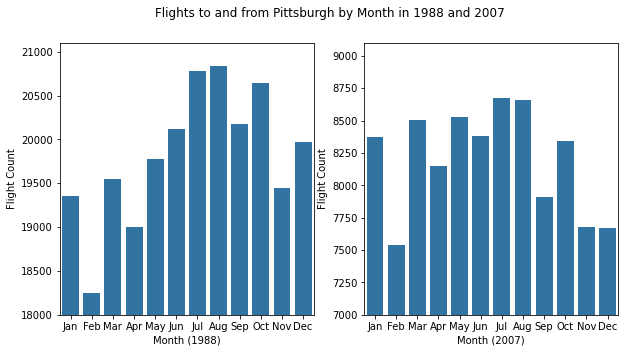

In [28]:
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
base_color = sns.color_palette()[0]

fig = plt.figure(figsize=(10,5))
fig.suptitle('Flights to and from Pittsburgh by Month in 1988 and 2007')

plt.subplot(1, 2, 1)
mon_fly_88 = pgh_flights_88['Month'].value_counts().sort_index()

g=sns.barplot(x=mon_fly_88.index, y=mon_fly_88, color=base_color)
g.set_xticklabels(labels=months)
g.set_ylabel('Flight Count')
g.set_xlabel('Month (1988)')
g.set_ylim(18000, 21100);

plt.subplot(1, 2, 2)
mon_fly_07 = pgh_flights_07['Month'].value_counts().sort_index()

g=sns.barplot(x=mon_fly_07.index, y=mon_fly_07, color=base_color)
g.set_xticklabels(labels=months)
g.set_ylabel('Flight Count')
g.set_xlabel('Month (2007)')
g.set_ylim(7000, 9100);


#### 2. Most Popular Day of the Week to Fly

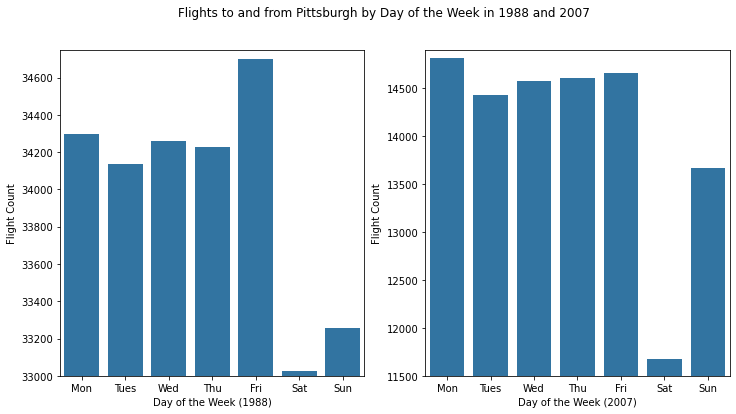

In [29]:
days_of_week = ['Mon', 'Tues', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
base_color = sns.color_palette()[0]

fig = plt.figure(figsize=(12,6))
fig.suptitle('Flights to and from Pittsburgh by Day of the Week in 1988 and 2007')

plt.subplot(1, 2, 1)
day_fly_88 = pgh_flights_88['DayOfWeek'].value_counts().sort_index()

g=sns.barplot(x=day_fly_88.index, y=day_fly_88, color=base_color)
g.set_xticklabels(labels=days_of_week)
g.set_ylabel('Flight Count')
g.set_xlabel('Day of the Week (1988)')
g.set_ylim(33000, 34750);

plt.subplot(1, 2, 2)
day_fly_07 = pgh_flights_07['DayOfWeek'].value_counts().sort_index()

g=sns.barplot(x=day_fly_07.index, y=day_fly_07, color=base_color)
g.set_xticklabels(labels=days_of_week)
g.set_ylabel('Flight Count')
g.set_xlabel('Day of the Week (2007)')
g.set_ylim(11500, 14900);

#### 3. Most Popular Flight Origin

In [30]:
origins88 = pgh_flights_88.query("Origin != 'PIT'").Origin.value_counts()


In [31]:
print(origins88)

ORD    6307
ATL    5125
EWR    4533
PHL    3753
DTW    3739
       ... 
LAS     240
GSP     153
ORH     117
MYR      34
CAK       3
Name: Origin, Length: 79, dtype: int64


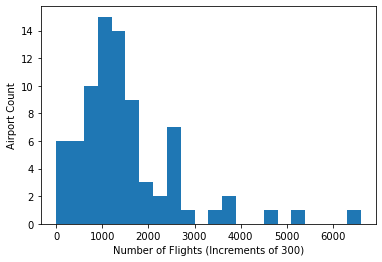

In [32]:
bins = np.arange(0, origins88.max() + 300, 300)
plt.hist(origins88, bins = bins)
plt.xlabel('Number of Flights (Increments of 300)')
plt.ylabel('Airport Count');

In [33]:
origins07 = pgh_flights_07.query("Origin != 'PIT'").Origin.value_counts()

In [34]:
print(origins07)
print(len(origins07), 'origins')

ATL    4492
ORD    4386
PHL    3457
JFK    2524
LGA    2522
MCO    2426
EWR    2349
DFW    2305
CLT    2146
MDW    2053
DTW    1912
IAH    1730
IAD    1546
BOS    1511
LAS    1372
CVG    1370
MSP    1325
DEN    1253
PHX    1090
MEM     977
TPA     914
BWI     886
MKE     754
FLL     751
DCA     625
MIA     509
LAX     440
SFO     429
MCI     390
SLC     305
RSW     193
PBI     172
SJU      52
SEA      19
MYR      13
SAN      12
Name: Origin, dtype: int64
36 origins


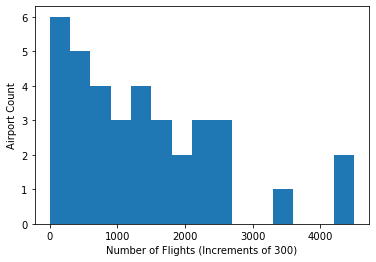

In [35]:
bins = np.arange(0, origins07.max() + 300, 300)
plt.hist(origins07, bins = bins)
plt.xlabel('Number of Flights (Increments of 300)')
plt.ylabel('Airport Count');

#### 4. Most Popular Flight Destination

In [36]:
destinations88 = pgh_flights_88.query("Dest != 'PIT'").Dest.value_counts()

In [37]:
print(destinations88)

ORD    6355
ATL    5104
EWR    4434
PHL    3818
DTW    3780
       ... 
LAS     234
GSP     144
ORH     116
MYR      34
TUS       1
Name: Dest, Length: 79, dtype: int64


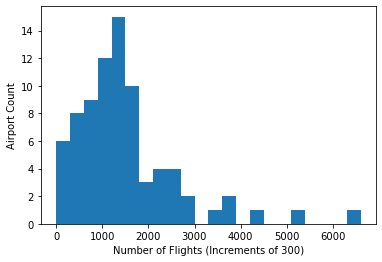

In [38]:
bins = np.arange(0, destinations88.max() + 300, 300)
plt.hist(destinations88, bins = bins)
plt.xlabel('Number of Flights (Increments of 300)')
plt.ylabel('Airport Count');


In [39]:
destinations07 = pgh_flights_07.query("Dest != 'PIT'").Dest.value_counts()

In [40]:
print(destinations07)
print(len(destinations07), 'destinations')

ATL    4485
PHL    4305
ORD    4284
JFK    2526
MCO    2422
EWR    2349
DFW    2308
LGA    2155
MDW    2063
CLT    2006
DTW    1948
IAH    1729
BOS    1562
IAD    1541
LAS    1373
CVG    1371
MSP    1292
DEN    1253
PHX    1090
MEM     975
TPA     915
BWI     876
MKE     744
FLL     692
MIA     508
LAX     441
SFO     429
DCA     399
MCI     391
SLC     304
RSW     194
PBI     172
SJU      52
SEA      19
MYR      13
SAN      12
MSN       2
GRR       2
CMH       1
CAE       1
PVD       1
TYS       1
DSM       1
PWM       1
COS       1
Name: Dest, dtype: int64
45 destinations


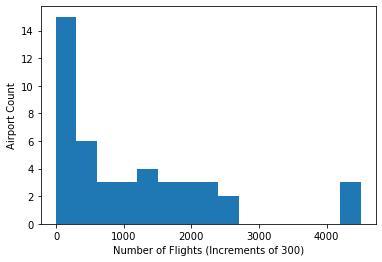

In [41]:
bins = np.arange(0, destinations07.max() + 300, 300)
plt.hist(destinations07, bins = bins)
plt.xlabel('Number of Flights (Increments of 300)')
plt.ylabel('Airport Count');

#### 5. Flight Length

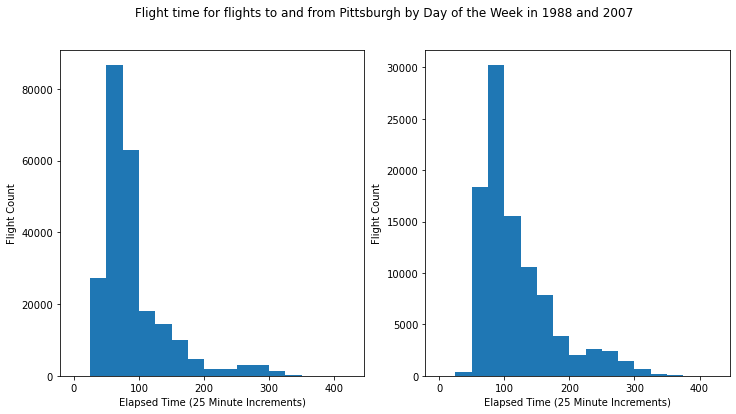

In [42]:
base_color = sns.color_palette()[0]
bins = np.arange(0, pgh_flights_88.ActualElapsedTime.max()+ 25, 25)

fig = plt.figure(figsize=(12,6))
fig.suptitle('Flight time for flights to and from Pittsburgh by Day of the Week in 1988 and 2007')

plt.subplot(1, 2, 1)
plt.hist(pgh_flights_88.ActualElapsedTime, bins = bins)
plt.ylabel('Flight Count')
plt.xlabel('Elapsed Time (25 Minute Increments)');

plt.subplot(1, 2, 2)
plt.hist(pgh_flights_07.ActualElapsedTime, bins = bins)
plt.ylabel('Flight Count')
plt.xlabel('Elapsed Time (25 Minute Increments)');

C:\Users\Miles\anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


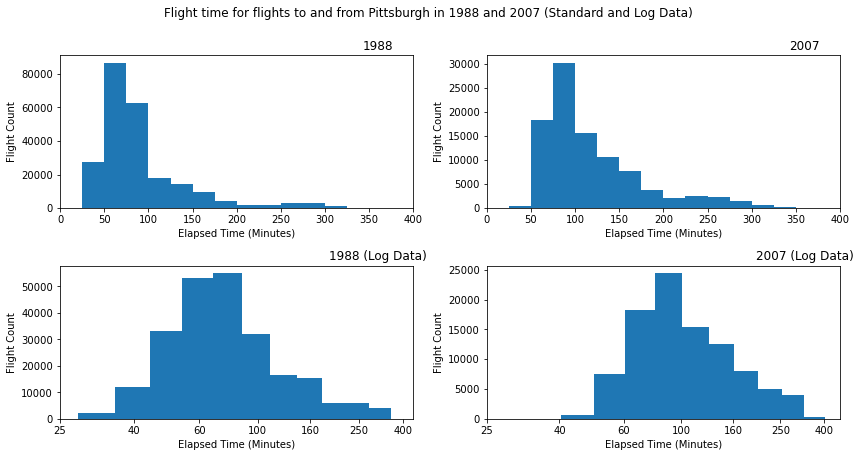

In [43]:
# Credit to https://stackoverflow.com/questions/8248467/matplotlib-tight-layout-doesnt-take-into-account-figure-suptitle
# Credit to https://stackoverflow.com/questions/13228254/subplots-are-overlapping-axis-labels
base_color = sns.color_palette()[0]
bins_88 = np.arange(0, pgh_flights_88.ActualElapsedTime.max()+ 25, 25)
bins_07 = np.arange(0, pgh_flights_07.ActualElapsedTime.max()+ 25, 25)

fig = plt.figure(figsize=(12,6))
fig.suptitle('Flight time for flights to and from Pittsburgh in 1988 and 2007 (Standard and Log Data)', y = 1.05)

#Subplot 1
plt.subplot(2, 2, 1)
plt.tight_layout()
plt.hist(pgh_flights_88.ActualElapsedTime, bins = bins_88)
plt.xlim(0,400)
plt.ylabel('Flight Count')
plt.xlabel('Elapsed Time (Minutes)')
plt.title("1988", x=0.9, y=-20);

#Subplot 2
plt.subplot(2, 2, 2)
plt.tight_layout()
plt.hist(pgh_flights_07.ActualElapsedTime, bins = bins_07)
plt.xlim(0,400)
plt.ylabel('Flight Count')
plt.xlabel('Elapsed Time (Minutes)')
plt.title("2007", x=0.9, y=-20);

#Create log data for transformation
log_data_88 = np.log10(pgh_flights_88.ActualElapsedTime) 
log_bins_88 = np.arange(log_data_88.min(), log_data_88.max(), .1)
log_data_07 = np.log10(pgh_flights_07.ActualElapsedTime)
log_bins_07 = np.arange(log_data_07.min(), log_data_07.max(), .1)
log_ticks = [1.4, 1.6, 1.8, 2.0, 2.2, 2.4, 2.6]
log_labels = ['25', '40', '60', '100', '160', '250', '400']

#Subplot 3
plt.subplot(2, 2, 3)
plt.tight_layout()
plt.hist(log_data_88, bins = log_bins_88)
plt.xscale('log')
plt.ylabel('Flight Count')
plt.xlim(1.4,)
plt.xlabel('Elapsed Time (Minutes)')
plt.xticks(log_ticks, log_labels)
plt.title("1988 (Log Data)", x=0.9, y=-20);

#Subplot 4
plt.subplot(2, 2, 4)
plt.tight_layout()
plt.hist(log_data_07, bins = log_bins_07)
plt.xscale('log')
plt.ylabel('Flight Count')
plt.xlabel('Elapsed Time (Minutes)')
plt.xticks(log_ticks, log_labels)
plt.title("2007 (Log Data)", x=0.9, y=-20);

#### 6. Delay Length

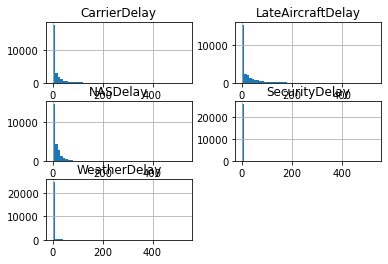

In [44]:
#Create a total delay time column and maybe reduce delays DF to contain minimal columns
bins = np.arange(0, delays_07.LateAircraftDelay.max(), 10)
delays_07.hist(column=['NASDelay', 'WeatherDelay', 'SecurityDelay', 'LateAircraftDelay','CarrierDelay'], bins=bins);

In [45]:
carrier_total = delays_07.CarrierDelay.sum()
nas_total = delays_07.NASDelay.sum()
weather_total = delays_07.WeatherDelay.sum()
security_total = delays_07.SecurityDelay.sum()
late_total = delays_07.LateAircraftDelay.sum()

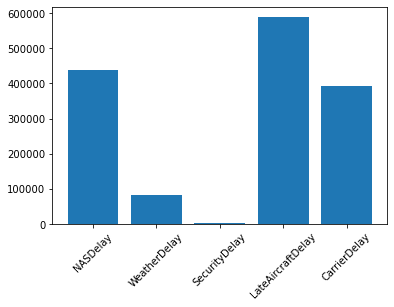

In [46]:
x_val = ['NASDelay', 'WeatherDelay', 'SecurityDelay', 'LateAircraftDelay','CarrierDelay']
y_val = [nas_total, weather_total, security_total, late_total, carrier_total]
plt.bar(x=x_val, height=y_val)
plt.xticks(rotation=45);

In [47]:
delays_07['total_delay'] = (delays_07.CarrierDelay + delays_07.WeatherDelay + delays_07.NASDelay + delays_07.SecurityDelay + delays_07.LateAircraftDelay)

C:\Users\Miles\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [50]:
delays_07.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,total_delay
1482,2007,1,2,2,15:04:00,14:35:00,22:19:00,21:40:00,WN,2659,...,8,0,NaN,0,0,29,10,0,0,39
2047,2007,1,2,2,14:00:00,13:35:00,16:08:00,15:50:00,WN,304,...,7,0,NaN,0,10,0,0,0,8,18
2050,2007,1,2,2,17:30:00,16:55:00,19:39:00,19:15:00,WN,723,...,11,0,NaN,0,4,0,0,0,20,24
2499,2007,1,2,2,18:36:00,18:10:00,19:55:00,19:25:00,WN,1597,...,25,0,NaN,0,2,0,4,0,24,30
2658,2007,1,2,2,15:55:00,14:50:00,21:45:00,20:55:00,WN,647,...,9,0,NaN,0,43,0,0,0,7,50


In [54]:
delays_07.total_delay.describe()

count    26090.000000
mean        57.613760
std         58.283968
min         15.000000
25%         23.000000
50%         37.000000
75%         70.000000
max       1655.000000
Name: total_delay, dtype: float64

In [55]:
delay_bins = np.arange(delays_07.total_delay.min() - 5, delays_07.total_delay.max() +5, 5)

(0.0, 100.0)

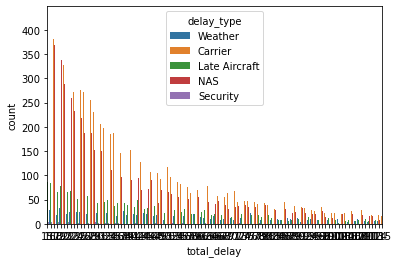

In [60]:
sns.countplot(data=delays_07, x = 'total_delay', hue = 'delay_type')
plt.xlim(0, 100)

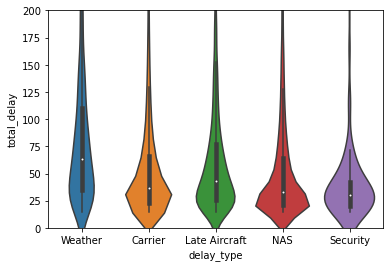

In [62]:
sns.violinplot(data=delays_07, x='delay_type', y='total_delay')
plt.ylim(0, 200);

#### 7. Delay Type